In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mapearIdade(idade):
    if idade <= 30:
        return 'até 30'
    elif idade <= 50:
        return '31 a 50'
    elif idade <= 70:
        return '51 a 70'
    elif idade <= 90:
        return '71 a 90'
    else:
        return '91 ou mais'

def mapearExpectativaVida(faixa):
    if faixa == 'até 30': return 0.05
    if faixa == '31 a 50': return 0.3
    if faixa == '51 a 70': return 0.3
    if faixa == '71 a 90': return 0.5
    return 0.8

def criar_df(curva, filiados):
    # Define age groups
    idades = list(range(25, 100))

    # Create a normal distribution with a mean and standard deviation
    mean_age = curva  # Mean age
    std_deviation = 15  # Standard deviation

    # Generate 2000 random ages following a normal distribution
    ages = np.random.normal(mean_age, std_deviation, filiados)

    # Clip the generated ages to stay within the defined range
    ages = np.clip(ages, min(idades), max(idades))

    # Round the ages to the nearest integer
    ages = np.round(ages).astype(int)

    # Count the number of people in each age group
    age_counts = {idade: ages.tolist().count(idade) for idade in idades}

    # Create a DataFrame
    data = {
        'idade': idades, 
        'faixa': [mapearIdade(idade) for idade in idades],
        'quantidade': [age_counts[idade] for idade in idades]
    }
    
    return pd.DataFrame(data)

def pivotarContagemIdade(df):

    df['expectativa'] = df['faixa'].apply(mapearExpectativaVida)

    df['falecidos'] = df['quantidade'] * df['expectativa']
    df['falecidos'] = df['falecidos'].astype(int)

    df['vivos'] = df['quantidade']-df['falecidos']
    df['vivos'] = df['vivos'].astype(int)

    pivot_table = df.pivot_table(index='faixa', values=['falecidos', 'vivos'], aggfunc='sum')

    return pivot_table

def criarBarChart(df):

    plt.style.use('dark_background')

    bars = plt.bar(df['faixa'], df['quantidade'], color='skyblue', edgecolor='lightblue', linewidth=2, alpha=0.7)

    plt.grid(axis='y', linestyle='--', alpha=0.5)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=12, color='white')

    plt.figure(figsize=(12, 6))
    plt.bar(df['faixa'], df['quantidade'], color='skyblue')
    plt.xlabel('Faixa etária')
    plt.ylabel('Número de filiados')
    plt.title('Distribuição etária dos filiados')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return plt.gcf()

def criarBarChart_vivos_e_falecidos(pivot_table):

    # Create a stacked column chart
    pivot_table[['falecidos', 'vivos']].plot(kind='bar', stacked=True, figsize=(12, 6))

    # Add labels and a title
    plt.xlabel('Age Groups (Faixa)')
    plt.ylabel('Count')
    plt.title('Stacked Column Chart of Deceased and Alive by Age Group')

    # Customize the legend (optional)
    plt.legend(title='Legend', labels=['Deceased', 'Alive'])

    # Show the chart
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt.gcf()

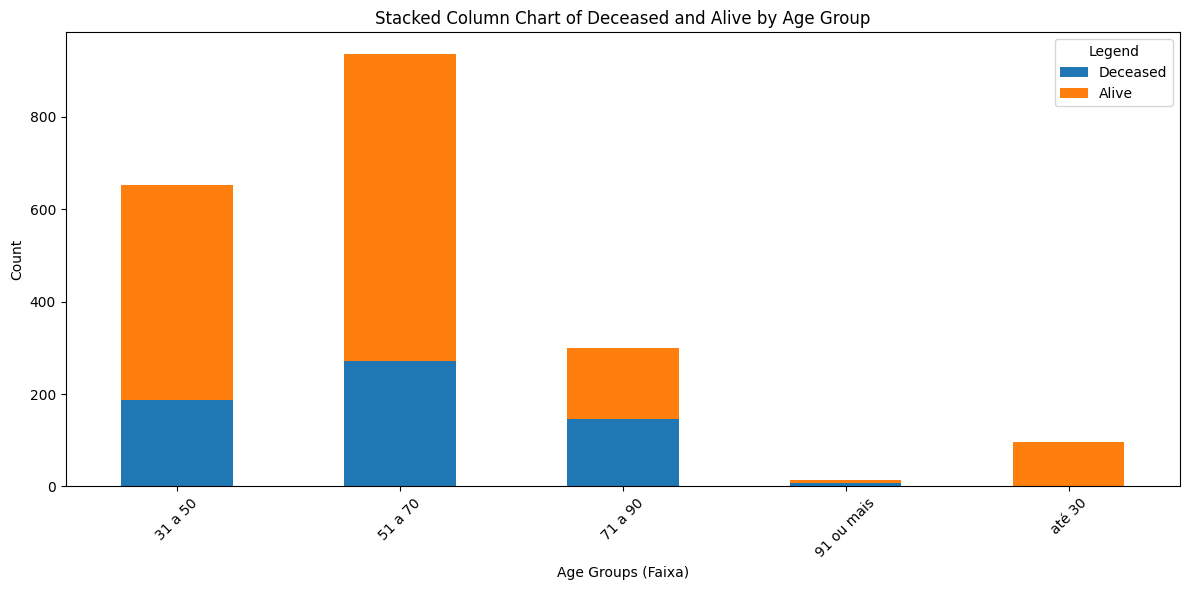

In [26]:
curva = 55
filiados = 2000

df = criar_df(curva, int(filiados))
pivot_table = pivotarContagemIdade(df)
criarBarChart_vivos_e_falecidos(pivot_table)